# Group and Pivot

In [1]:
from datetime import datetime
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### From Last Time

In [4]:
def datetime_parser(string):
    datetime_object = datetime.strptime(string, '%m/%d/%y')
    return datetime_object

In [5]:
covid_us = Table().read_table("../covid_data/covid_us.txt")
covid_us = covid_us.with_column("New Date", covid_us.apply(datetime_parser, "Date"))
covid_us = covid_us.drop('Country_Region','UID','iso2','iso3','code3','FIPS', 'Lat', 'Long_', 'Combined_Key')

covid_california = covid_us.where('Province_State', are.equal_to('California'))
covid_alameda_county = covid_us.where('Admin2', are.equal_to('Alameda'))
covid_alameda_county.show(5)

Unnamed: 0,Admin2,Province_State,Date,Confirmed,Deaths,New Date
268,Alameda,California,1/22/20,0,0,2020-01-22 00:00:00
3608,Alameda,California,1/23/20,0,0,2020-01-23 00:00:00
6948,Alameda,California,1/24/20,0,0,2020-01-24 00:00:00
10288,Alameda,California,1/25/20,0,0,2020-01-25 00:00:00
13628,Alameda,California,1/26/20,0,0,2020-01-26 00:00:00


#### Group By (All about aggregation)

Find for each date the total number of Deaths and Confirmed Cases in Alameda County. Each row for each day is unique so technically .group is not neccessary, but lets pretend that there are multiple rows with the same day and thus we need to use .group to get the aggregated results.

In [6]:
grouped_covid_ac = covid_alameda_county.select('New Date', 'Confirmed', 'Deaths').group('New Date', sum)
grouped_covid_ac.show(5)

New Date,Confirmed sum,Deaths sum
2020-01-22 00:00:00,0,0
2020-01-23 00:00:00,0,0
2020-01-24 00:00:00,0,0
2020-01-25 00:00:00,0,0
2020-01-26 00:00:00,0,0


Cannot see much from this data so what is a good way to visualize this data to gather insights

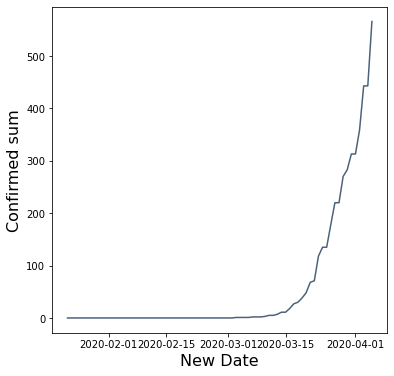

In [7]:
sorted_covid_ac = grouped_covid_ac.sort("New Date", descending=False)

#### Sorting is acting weird with original Date column use New Date
# sorted_covid_ac['New Date']

######### CONFIRMED CASES THROUGH TIME ##############
sorted_covid_ac.plot("New Date", "Confirmed sum")


Why was there such a big gap with no cases? If there were covid cases earlier than March 22, 2020 why were they not recorded? 

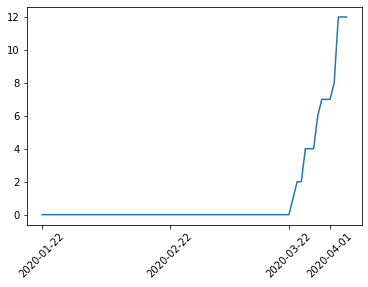

In [8]:
plt.plot(sorted_covid_ac['New Date'], sorted_covid_ac['Deaths sum']);
plt.xticks([datetime(2020, 1, 22, 0, 0), datetime(2020, 2, 22, 0, 0),datetime(2020, 3, 22, 0, 0), datetime(2020, 4, 1, 0, 0)], rotation=45);

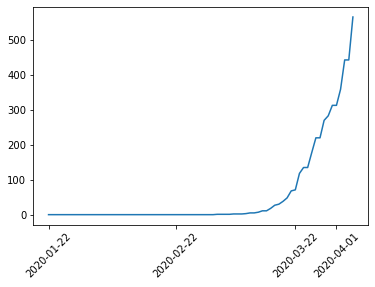

In [9]:
plt.plot(sorted_covid_ac['New Date'], sorted_covid_ac['Confirmed sum']);
plt.xticks([datetime(2020, 1, 22, 0, 0), datetime(2020, 2, 22, 0, 0),datetime(2020, 3, 22, 0, 0), datetime(2020, 4, 1, 0, 0)], rotation=45);

### Pivots